# Atividade 4 - 30/10/2018

**Apresentação da Tarefa:** 30/10/18 <br>
**Data da Entrega:** 08/11/18

### Equipe

- Luiz Eduardo Fernandes Bentes - 1415080151
- Vitor Matheus de Souza Carvalho - 1515080624

**Link para o Repositório:** https://github.com/VitorMatheus097/ANN-FourthProject

## Importação de bibliotecas e funções auxiliares

In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
def classificationReport(Y_true, Y_predicted, model, average):
    accuracy = accuracy_score(Y_true, Y_predicted)
    precision = precision_score(Y_true, Y_predicted, average=average)
    recall = recall_score(Y_true, Y_predicted, average=average)
    f1Score = f1_score(Y_true, Y_predicted, average=average)
    
    cfDict = {'Acurácia': accuracy, 
              'Precisão' : precision, 
              'Revocação' : recall, 
              'F-Score': f1Score}

    classificationDescription = pd.DataFrame(cfDict, index=[model])
    return classificationDescription

## Preparação dos dados

In [3]:
path = os.path.join('data', 'seeds.csv')

data = pd.read_csv(path)
data.sample(3)

,area_A,perimeter_P,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
99,18.72,16.34,0.8810,6.219,3.684,2.188,6.097,2
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,1


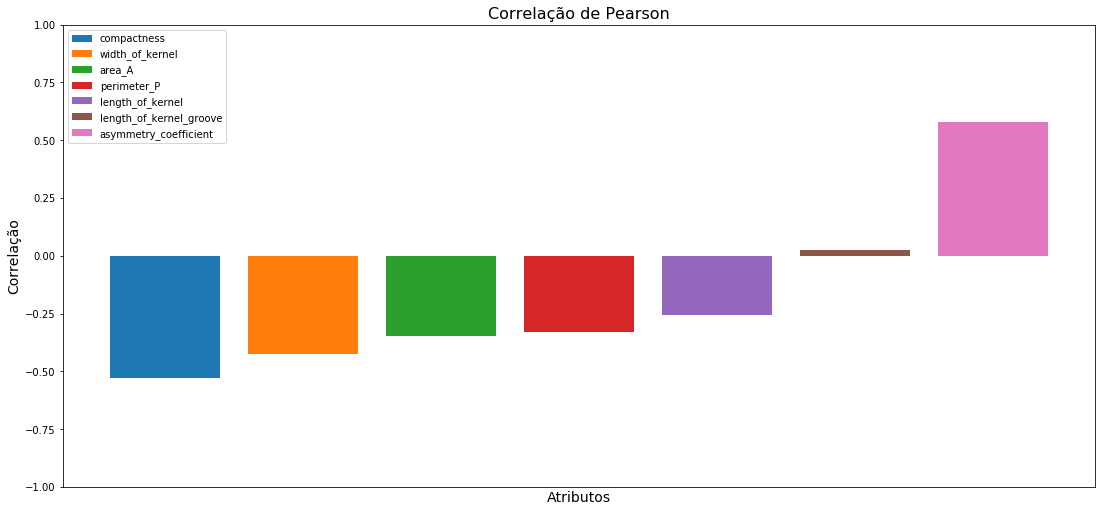

In [4]:
correlations = data[data.columns.drop(['class'])].corrwith(data['class'])
correlations.sort_values(inplace=True)

ax = plt.axes()
for x, y, label in zip(range(0, len(correlations)), correlations, correlations.keys()):
    ax.bar(x, y, label=label)

plt.title("Correlação de Pearson", fontsize=16)
plt.xlabel('Atributos', fontsize=14)
plt.ylabel('Correlação', fontsize=14)

ax.set(ylim=[-1, 1])
plt.xticks([])
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)

plt.show()

Como observado acima, o atributo ***length_of_kernel_groove*** possui a menor correlção linear com o atributo alvo, deste modo, o mesmo foi descosiderado para a etapa de treinamento, visto que pouco refletiria no resultado final. 

In [5]:
X, Y = data[data.columns.drop(['length_of_kernel_groove', 'class'])], data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

## Parâmetros da rede

In [6]:
alphas, ni, no = [0.5, 2.0, 3.0], len(X_train.columns), 3
hidden_layers = []

for alpha in alphas:
    nh = int(round(alpha * np.sqrt(ni * no)))
    
    for i in range(1, nh+1):
        if (nh - i):
            t = (ni, i, nh-i, no,)
        else:
            t = (ni, i, no,)
        
        hidden_layers.append(t)

In [7]:
params = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
          'solver' : ['lbfgs'],
          'alpha' : [1e-3, 1e-5, 1e-7],
          'learning_rate' : ['adaptive'],
          'hidden_layer_sizes' : hidden_layers}

## Treinamento e Resultados

In [8]:
gs = GridSearchCV(MLPClassifier(), params, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=False)
gs.fit(X, Y);

In [9]:
results = pd.DataFrame(gs.cv_results_).drop(['params'], axis=1)
results.sort_values('rank_test_score', inplace=True)

In [10]:
best_model = gs.best_estimator_
best_model.fit(X_train, Y_train);

Y_pred = best_model.predict(X_test)

#### Melhores modelos

In [11]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,0.298960,0.016029,0.000451,0.000017,identity,1e-05,"(6, 2, 3)",adaptive,lbfgs,0.958333,0.927536,0.811594,0.900000,0.063117,1
248,0.158502,0.058239,0.000486,0.000004,relu,1e-05,"(6, 9, 4, 3)",adaptive,lbfgs,0.944444,0.942029,0.797101,0.895238,0.068658,2
6,0.107995,0.004040,0.000465,0.000014,identity,0.001,"(6, 5, 3, 3)",adaptive,lbfgs,0.958333,0.927536,0.797101,0.895238,0.069800,2
52,0.187504,0.017434,0.000455,0.000008,identity,1e-07,"(6, 5, 3, 3)",adaptive,lbfgs,0.972222,0.927536,0.782609,0.895238,0.080887,2
18,0.108788,0.003091,0.000464,0.000014,identity,0.001,"(6, 9, 4, 3)",adaptive,lbfgs,0.958333,0.927536,0.797101,0.895238,0.069800,2


#### Melhor modelo

In [12]:
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,0.29896,0.016029,0.000451,0.000017,identity,1e-05,"(6, 2, 3)",adaptive,lbfgs,0.958333,0.927536,0.811594,0.9,0.063117,1


## Métricas de Desempenho

#### Métricas

In [13]:
results = classificationReport(Y_test, Y_pred, 'Melhor Modelo', 'macro')
results

,Acurácia,Precisão,Revocação,F-Score
Melhor Modelo,0.928571,0.925,0.925334,0.924991


#### Matriz de Confusão

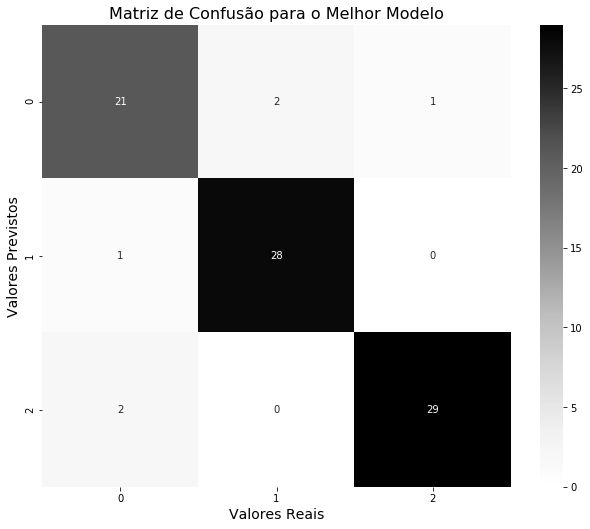

In [14]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='d', annot=True, cmap='Greys')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.5)

plt.title('Matriz de Confusão para o Melhor Modelo', fontsize=16)
plt.xlabel('Valores Reais', fontsize=14);
plt.ylabel('Valores Previstos', fontsize=14);

plt.show()

## Conclusões

Diante dos resultados, o modelo que melhor se adequou à tarefa obteve **92.86%** de acurácia, sendo composto por 3 camadas ocultas e utilizando a função identidade como função de ativação. O solver escolhido foi o **lbfgs** visto que este é mais adequado a datasets pequenos como é o caso do dataset utilizado, o qual possui apenas 210 exemplos. Ainda a respeito do solver, este também se justifica devido às suas características de desempenho, pois leva menos tempo para convergência na etapa de treinamento, característica fundamental neste experimento, dada a quantidade de diferentes redes treinadas.